In [1]:
import sys
from sklearn.preprocessing import MinMaxScaler
sys.path.append("./../src/")

# Modules of src folder
import data_loader as dl
import run
import visualizations

## Prepare models

In [2]:
uebb = dl.load_uebb_data(from_raw=False)

In [3]:
# See run.py for meaning of these parameters
uk = False
shifts = [1,6,144]
non_nan_percentage = 70
col_to_be_lagged = ["air_density","sonic_wind_speed","power"]
val_ratio = 0.2
scalers = [MinMaxScaler(),MinMaxScaler(),MinMaxScaler()]
model_name = "linreg"

## Run models

In [4]:
models = run.pipeline(uebb, model_name, uk, shifts, non_nan_percentage, 
                      col_to_be_lagged, val_ratio, scalers)

/Users/timw/Documents/University/renewable-energy-wind/doc/./../src/model.py:88: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  predictions = np.array([0 if pred < 0 else pred for pred in predictions])


Finished training model 10min horizon


/Users/timw/Documents/University/renewable-energy-wind/doc/./../src/model.py:88: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  predictions = np.array([0 if pred < 0 else pred for pred in predictions])


Finished training model 1 hour horizon
Finished training model 1 day horizon


/Users/timw/Documents/University/renewable-energy-wind/doc/./../src/model.py:88: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  predictions = np.array([0 if pred < 0 else pred for pred in predictions])


## Evaluate results

In [5]:
visualizations.plot_metrics("Beberide", models)

| Model Name              |     RMSE |   Benchmark_RMSE |      MAE |   Benchmark_MAE |
|:------------------------|---------:|-----------------:|---------:|----------------:|
| Beberide 10min horizon  |  54.2975 |          55.4172 |  35.6927 |         36.245  |
| Beberide 1 hour horizon | 112.314  |         119.25   |  80.4978 |         81.9437 |
| Beberide 1 day horizon  | 177.621  |         196.742  | 131.816  |        151.508  |


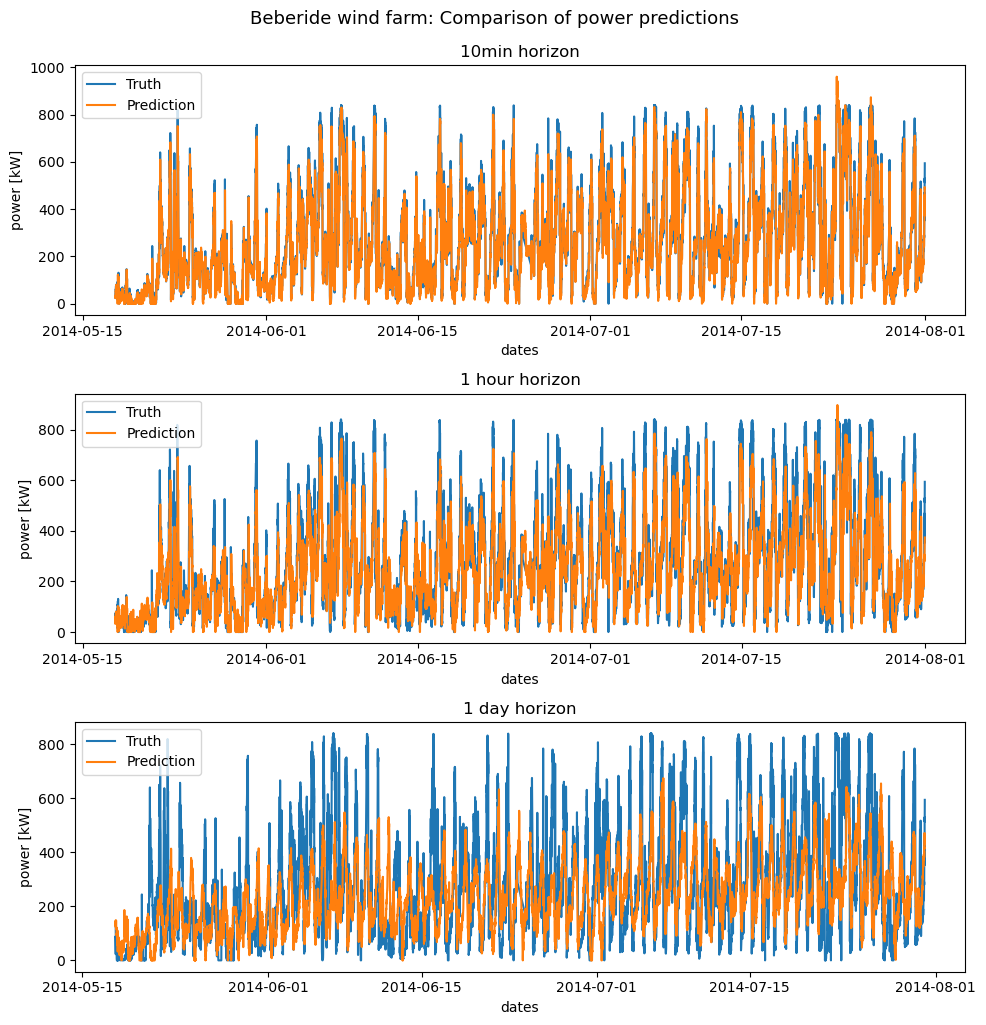

In [6]:
visualizations.plot_models("Beberide", models)